In [1]:
#download the folder
import gdown
gdown.download_folder("https://drive.google.com/drive/folders/1FB7bfL103cbIIlFywqvHoPYy5kEN8SGn")

Retrieving folder contents


Processing file 1EnZPvjHFiwvuBZ9ccFvDSNE5rz9LsTFF lena_colour.jpg
Processing file 1uRzfqkhSqIVRLkgdALZ1QF5xOJEw_z1F Lena-bw.png
Processing file 1YFCoWK2u-jeytfJunFReOK8pwa4PUPQy liver.jpg
Processing file 1VCAL8sO98C9aE_0qHRgseFuocCt23i3P MRI_heart_4CB.jpg
Processing file 1swYtC36pshXV5K6jr9zsOpoheSj0-wio MRI_heart_SAX.jpg
Processing file 19oXgZl7YtyOY-ckREdd-tDdtGbUs32yV X-ray.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1EnZPvjHFiwvuBZ9ccFvDSNE5rz9LsTFF
To: /content/sample images/lena_colour.jpg
100%|██████████| 370k/370k [00:00<00:00, 30.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uRzfqkhSqIVRLkgdALZ1QF5xOJEw_z1F
To: /content/sample images/Lena-bw.png
100%|██████████| 190k/190k [00:00<00:00, 60.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YFCoWK2u-jeytfJunFReOK8pwa4PUPQy
To: /content/sample images/liver.jpg
100%|██████████| 11.5k/11.5k [00:00<00:00, 23.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VCAL8sO98C9aE_0qHRgseFuocCt23i3P
To: /content/sample images/MRI_heart_4CB.jpg
100%|██████████| 11.7k/11.7k [00:00<00:00, 20.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1swYtC36pshXV5K6jr9zsOpoheSj0-wio
To: /content/sample images/MRI_heart_SAX.jpg
100%|██████████| 13.3k/13.3k [00:00<00:00, 19.5M

['/content/sample images/lena_colour.jpg',
 '/content/sample images/Lena-bw.png',
 '/content/sample images/liver.jpg',
 '/content/sample images/MRI_heart_4CB.jpg',
 '/content/sample images/MRI_heart_SAX.jpg',
 '/content/sample images/X-ray.jpg']

In [2]:
#import
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def region_growing(image, seed, threshold):
    height, width = image.shape #image size
    segmented = np.zeros_like(image, dtype=np.uint8) #output image with same size, initialized to 0
    seed_x, seed_y = seed #initial seed point
    seed_value = image[seed_y, seed_x] #seed point in image

    #for 8 neighbours
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)] #neighbours

    #keep the seed point in stack
    stack = [(seed_x, seed_y)]

    #visit the points in stack
    while stack:
        x, y = stack.pop() #pop operation LIFO

        if segmented[y, x] == 0:  # Not visited
            segmented[y, x] = 255 # Mark as part of the region

            #check the neighbours
            for dx, dy in neighbors:
                #new points
                nx, ny = x + dx, y + dy

                #point is inside the image region
                if 0 <= nx < width and 0 <= ny < height:
                    #check if the difference is less than threshold

                    if segmented[ny, nx] == 0 and abs(int(image[ny, nx]) - int(seed_value)) < threshold:
                        #append the new points
                        stack.append((nx, ny))
    return segmented

In [4]:
# Load a image
def process_example(image_path, seed, threshold):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #read an image
    segmented = region_growing(image, seed, threshold)#get the result from region growing algorithm

    plt.figure(figsize=(10, 5)) #plot size

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.scatter(*seed[::-1], color='red', s=50, label='Seed')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap='gray')
    plt.title("Region Grown Segmentation")

    plt.show()
    return segmented

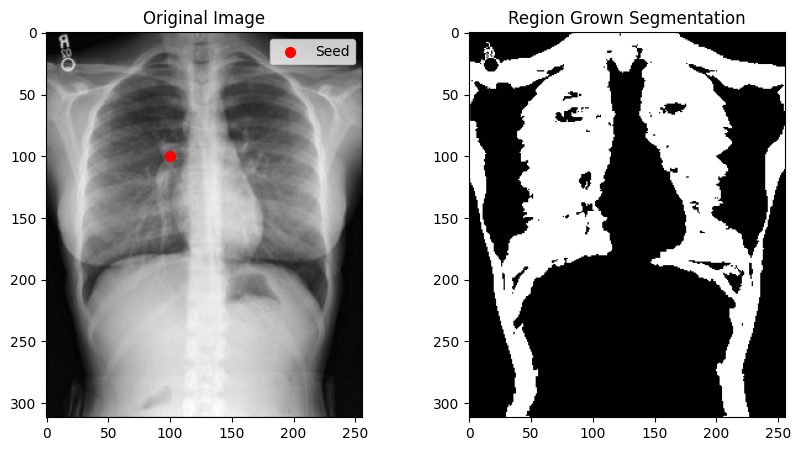

In [5]:
a = process_example("/content/sample images/X-ray.jpg", seed=(100, 100), threshold=40)

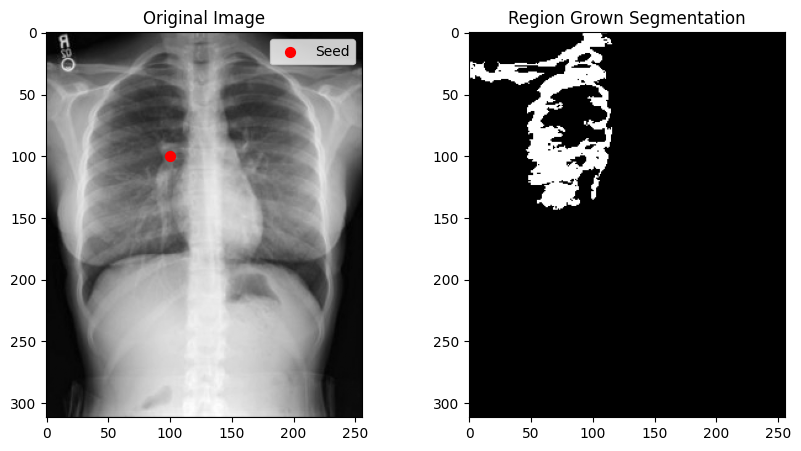

In [6]:
b = process_example("/content/sample images/X-ray.jpg", seed=(100, 100), threshold=20)

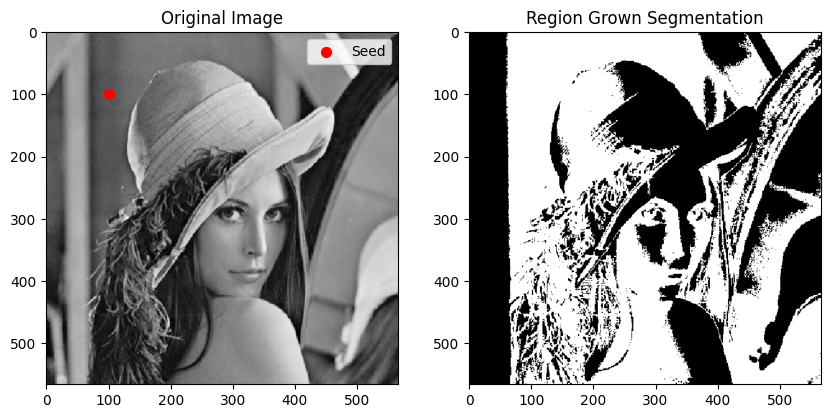

In [7]:
c = process_example("/content/sample images/Lena-bw.png", seed=(100, 100), threshold=60)

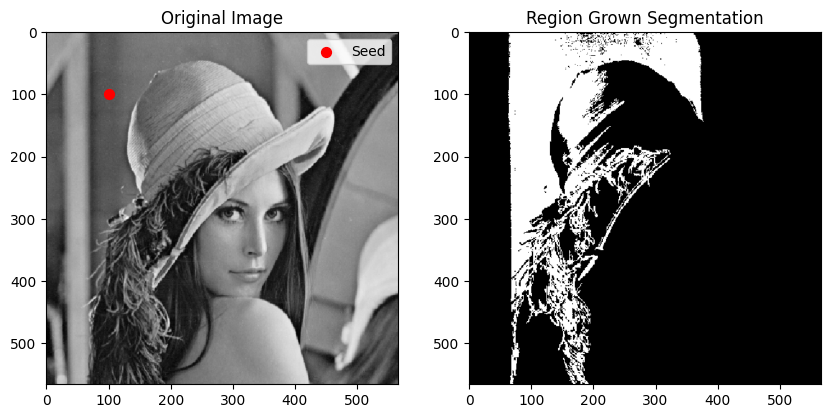

In [8]:
d = process_example("/content/sample images/Lena-bw.png", seed=(100, 100), threshold=40)

#Effect of Initial Seed Point

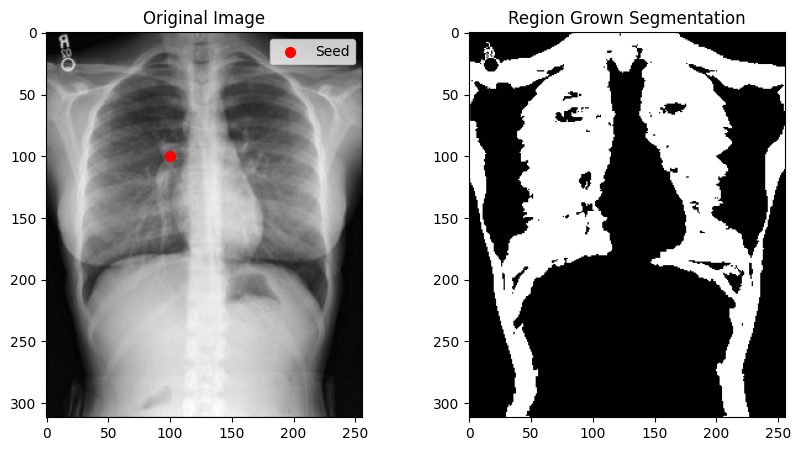

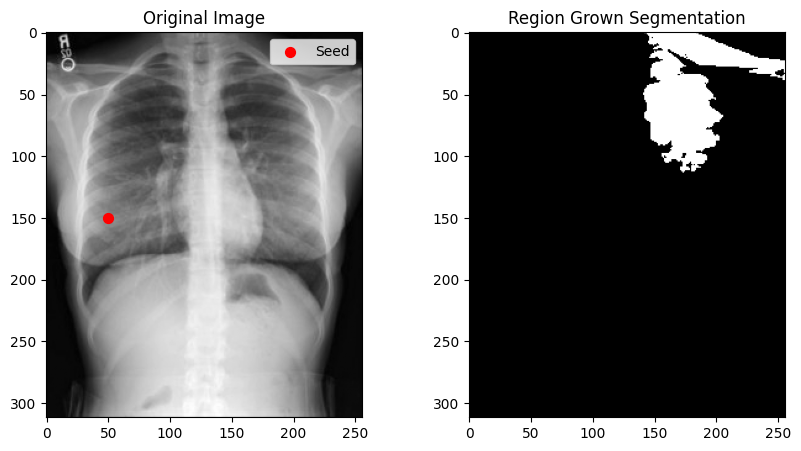

In [9]:
image = cv2.imread("/content/sample images/X-ray.jpg", cv2.IMREAD_GRAYSCALE)
e = process_example("/content/sample images/X-ray.jpg", seed=(100, 100), threshold=40)
f = process_example("/content/sample images/X-ray.jpg", seed=(150, 50), threshold=40)

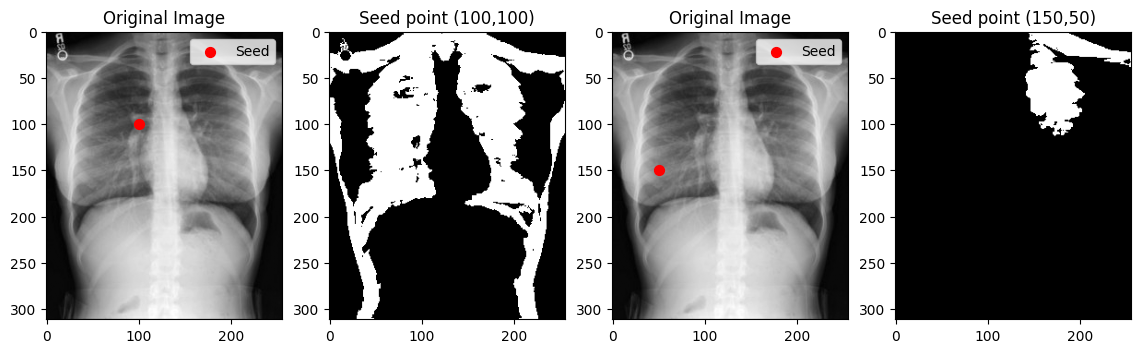

In [10]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.scatter([100], [100], color='red', s=50, label='Seed')
plt.legend()
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(e, cmap='gray')
plt.title("Seed point (100,100)")

plt.subplot(1, 4, 3)
plt.imshow(image, cmap='gray')
plt.scatter([50], [150], color='red', s=50, label='Seed')
plt.legend()
plt.title("Original Image")

plt.subplot(1, 4, 4)
plt.imshow(f, cmap='gray')
plt.title("Seed point (150,50)")

plt.show()

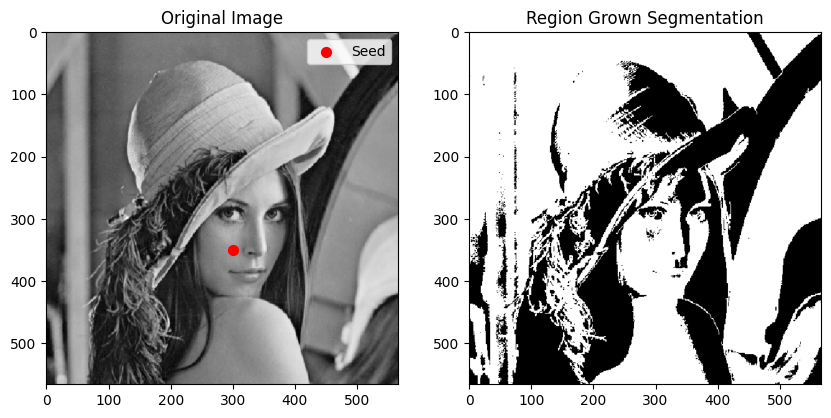

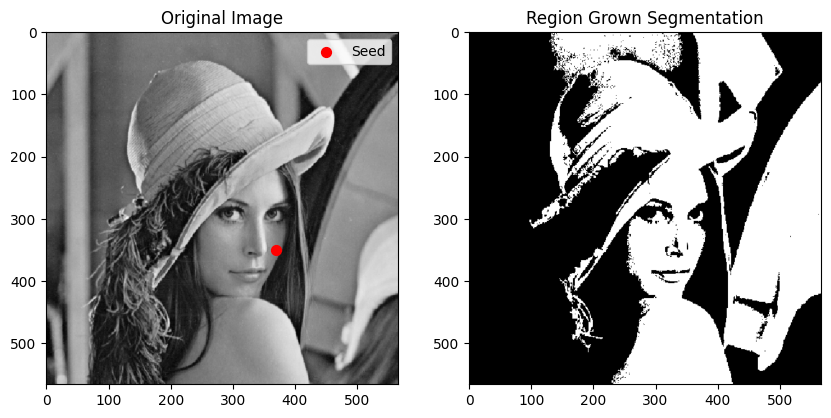

In [11]:
image = cv2.imread("/content/sample images/Lena-bw.png", cv2.IMREAD_GRAYSCALE)
g = process_example("/content/sample images/Lena-bw.png", seed=(350, 300), threshold=60)
h = process_example("/content/sample images/Lena-bw.png", seed=(350, 370), threshold=60)

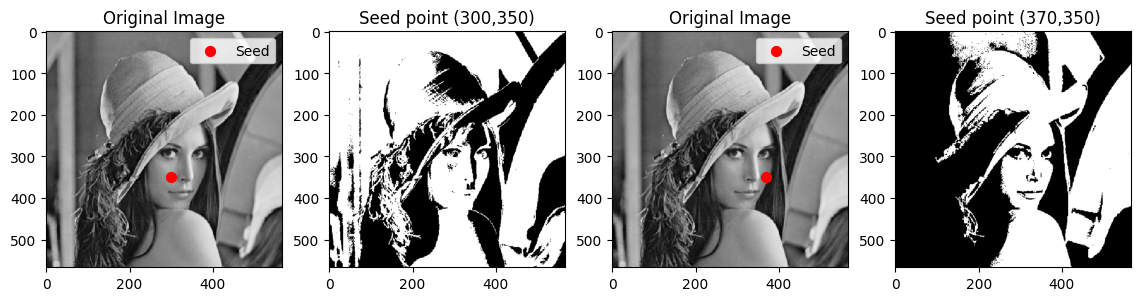

In [14]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.scatter([300], [350], color='red', s=50, label='Seed')
plt.legend()
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(g, cmap='gray')
plt.title("Seed point (300,350)")

plt.subplot(1, 4, 3)
plt.imshow(image, cmap='gray')
plt.scatter([370], [350], color='red', s=50, label='Seed')
plt.legend()
plt.title("Original Image")

plt.subplot(1, 4, 4)
plt.imshow(h, cmap='gray')
plt.title("Seed point (370,350)")

plt.show()